<a href="https://colab.research.google.com/github/keerthana2610/Intro-to-ML-Project/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting the given data file
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

Reading Data


In [ ]:
#creating dataframe
df = pd.read_csv("Data.csv")
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


# Pre-processing Dataset

In [ ]:
#drop all rows containing null values
df.dropna(inplace = True)

In [ ]:
#changing the data type from string to numeric
df['Dew Point'] = (df['Dew Point']).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   TAIL_NUM           28818 non-null  object 
 5   DEST               28818 non-null  object 
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  int64  
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

# Correlation of various features 

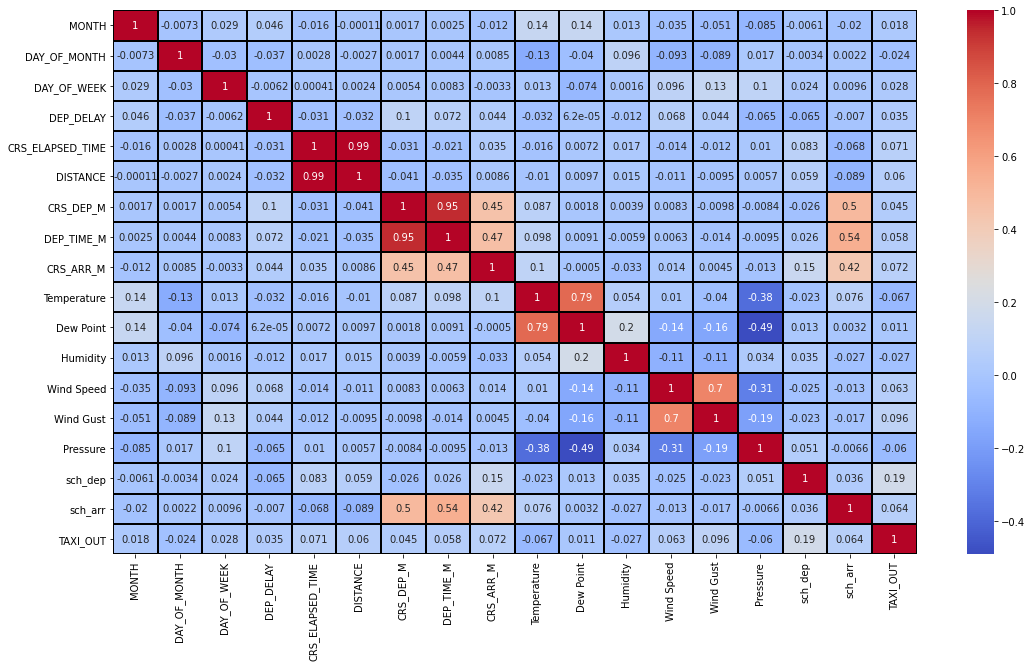

In [ ]:
#checking correlation
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), cmap= 'coolwarm', annot = True , linewidths=1, linecolor='black')

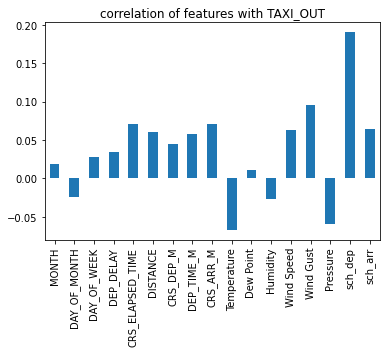

In [ ]:
#comparing correlation of various features with TAXI_OUT
df.drop(['TAXI_OUT'],axis = 1).corrwith(df['TAXI_OUT']).plot(kind = 'bar', title = 'correlation of features with TAXI_OUT')
plt.show()

In [ ]:
#separate target(TAXI_OUT) from other features 
y = df['TAXI_OUT']
x = df.drop(['TAXI_OUT'],axis = 1)
#separate numeric and object columns 
obj = list(x.select_dtypes(include = 'object').columns)
num = list(set(x.columns) - set(obj))
X= x.copy()

# **Label Encoding**

In [ ]:
#label encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
for col in obj:
    x[col] = label_encoder.fit_transform(x[col].astype(str))

#split the dataset 90:10   
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state =10)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Function to display RMSE

In [ ]:
#finding error (Root mean Square Error)
from sklearn.metrics import mean_squared_error 
RMSE=[]
def error(actual,prediction):
 rmse = mean_squared_error(actual, prediction, squared=False)
 RMSE.append(math.sqrt(mean_squared_error(actual, prediction)))
 return(rmse)

# **RMSE of Label Encoded data**

In [ ]:
#1)Linear Regression
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(x_train,y_train)
prediction = linreg.predict(x_test)
actual=y_test
print("Linear Regression:\n RMSE:", error(actual,prediction))

Linear Regression:
 RMSE: 6.605776287117015


In [ ]:
#2)ridge regression
from sklearn.linear_model import Ridge
rreg =Ridge(alpha=0.01)
rreg.fit(x_train,y_train)
prediction = rreg.predict(x_test)
actual=y_test
print("Ridge Regression:\n RMSE:", error(actual,prediction))

Ridge Regression:
 RMSE: 6.605776062270655


In [ ]:
#3)lasso regression
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.05)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
actual=y_test
print("Lasso Regression:\n RMSE:", error(actual,prediction))

Lasso Regression:
 RMSE: 6.6269329489420095


In [ ]:
#4)KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
actual=y_test
print("KNN Regression:\n RMSE:", error(actual,prediction))

KNN Regression:
 RMSE: 7.933908990324958


In [ ]:
#5)SVR  Model
from sklearn.svm import SVR
s = SVR()
s.fit(x_train,y_train)
prediction = s.predict(x_test)
actual=y_test
print("SVR Regression:\n RMSE:", error(actual,prediction))


SVR Regression:
 RMSE: 6.384202102019923


In [ ]:
#6)Naive Byes
from sklearn.linear_model import BayesianRidge 
nb=BayesianRidge()
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)
actual=y_test
print("Naive Byes Regression:\n RMSE:", error(actual,prediction))


Naive Byes Regression:
 RMSE: 6.60586740704905


In [ ]:
#7)Random Forest
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
actual=y_test
print("Random Forest Regression:\n RMSE:", error(actual,prediction))


Random Forest Regression:
 RMSE: 7.075752498585239


In [ ]:
#8)lightgbm
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)
prediction = lgbm.predict(x_test)
actual=y_test
print("LightGBM Regression:\n RMSE:", error(actual,prediction))


LightGBM Regression:
 RMSE: 5.745546453770054


In [ ]:
#storing all the error values in list named label_encoding
label_encoding=RMSE
print(label_encoding)
RMSE=[]

[6.605776287117015, 6.605776062270655, 6.6269329489420095, 7.933908990324958, 6.384202102019923, 6.60586740704905, 7.075752498585239, 5.745546453770054]


In [ ]:
#finding no.of unique values in object columns
x[obj].nunique()

OP_UNIQUE_CARRIER       9
TAIL_NUM             2092
DEST                   65
Wind                   18
Condition              25
dtype: int64

# **One Hot Encoding**

In [ ]:
#one hot encoding for columns with less than 50 unique values
ohe = pd.get_dummies(X, columns=['OP_UNIQUE_CARRIER', 'Wind', 'Condition'])

#label encoding for more than 50 unique values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ohe['DEST']=label_encoder.fit_transform(ohe['DEST'].astype(str))
ohe['TAIL_NUM']=label_encoder.fit_transform(ohe['TAIL_NUM'])

x_train, x_test, y_train, y_test = train_test_split(ohe,y, test_size = 0.1, random_state =10)


# **RMSE of One Hot Encoded Data**

In [ ]:
#1)linear regression
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()
linreg.fit(x_train,y_train)
prediction = linreg.predict(x_test)
actual=y_test
print("Linear Regression:\n RMSE:", error(actual,prediction))

Linear Regression:
 RMSE: 6.471529294254733


In [ ]:
#2)ridge regression
from sklearn.linear_model import Ridge
rreg =Ridge(alpha=0.01)
rreg.fit(x_train,y_train)
prediction = rreg.predict(x_test)
actual=y_test
print("Ridge Regression:\n RMSE:", error(actual,prediction))

Ridge Regression:
 RMSE: 6.471539852154207


In [ ]:
#3)lasso regression
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.05)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
actual=y_test
print("Lasso Regression:\n RMSE:", error(actual,prediction))

Lasso Regression:
 RMSE: 6.553611998096046


In [ ]:
#4)KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
actual=y_test
print("KNN Regression:\n RMSE:", error(actual,prediction))

KNN Regression:
 RMSE: 8.081215098855889


In [ ]:
#5)SVR  Model
from sklearn.svm import SVR
s = SVR()
s.fit(x_train,y_train)
prediction = s.predict(x_test)
actual=y_test
print("SVR Regression:\n RMSE:", error(actual,prediction))

SVR Regression:
 RMSE: 6.964706969559306


In [ ]:
#6)Naive Byes
from sklearn.linear_model import BayesianRidge 
nb=BayesianRidge()
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)
actual=y_test
print("Naive Byes Regression:\n RMSE:", error(actual,prediction))

Naive Byes Regression:
 RMSE: 6.480111978515664


In [ ]:
#7)Random Forest
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
actual=y_test
print("Random Forest Regression:\n RMSE:", error(actual,prediction))

Random Forest Regression:
 RMSE: 7.124159129557791


In [ ]:
#8)lightgbm
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)
prediction = lgbm.predict(x_test)
actual=y_test
print("LightGBM Regression:\n RMSE:", error(actual,prediction))

LightGBM Regression:
 RMSE: 5.761750709922141


In [ ]:
#storing all the error values in list named one_hot_encoding
one_hot_encoding=RMSE
print(one_hot_encoding)
RMSE=[]

[6.471529294254733, 6.471539852154207, 6.553611998096046, 8.081215098855889, 6.964706969559306, 6.480111978515664, 7.124159129557791, 5.761750709922141]


# **Comparision of LE and OHE with various algorithms**

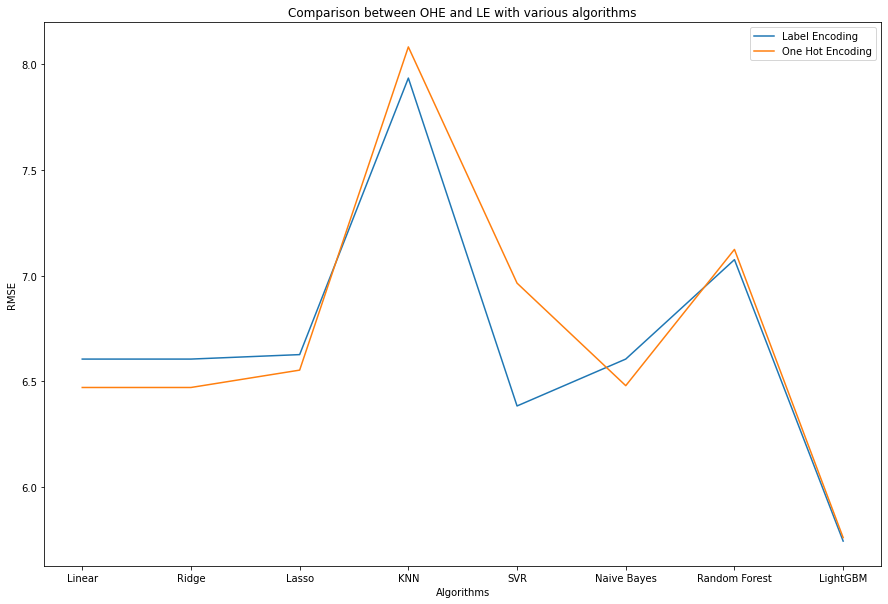

In [ ]:
arr1 = np.array(label_encoding)
arr2 = np.array(one_hot_encoding)

algorithm_names = ["Linear","Ridge","Lasso","KNN","SVR","Naive Bayes","Random Forest", "LightGBM"]
fig = plt.figure(figsize =(15, 10))
plt.plot(algorithm_names,arr1)
plt.plot(algorithm_names,arr2)
plt.legend(["Label Encoding","One Hot Encoding"])
plt.title("Comparison between OHE and LE with various algorithms")
plt.xlabel("Algorithms")
plt.ylabel("RMSE")
plt.show()

CONCLUSION :
            

*Label Encoding is better than One hot encoding for this dataset*

*The best result is seen in LightGBM model*